/home/ldmonte/workspace/SQLite/wmp_bf_efficiency/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


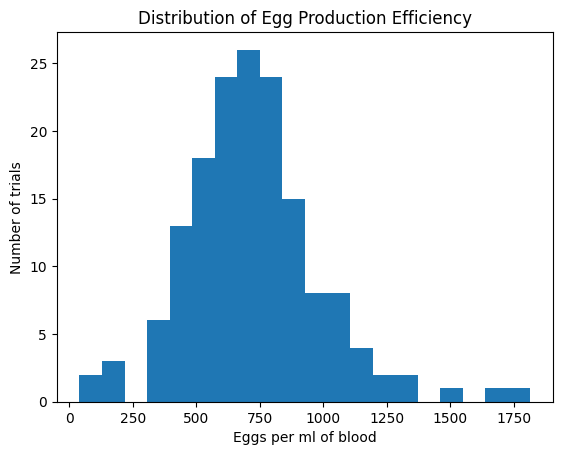

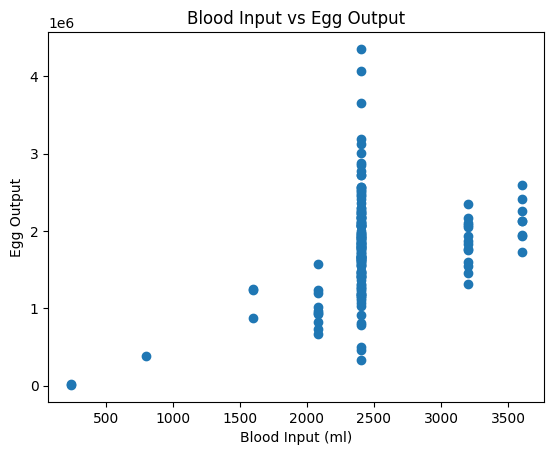

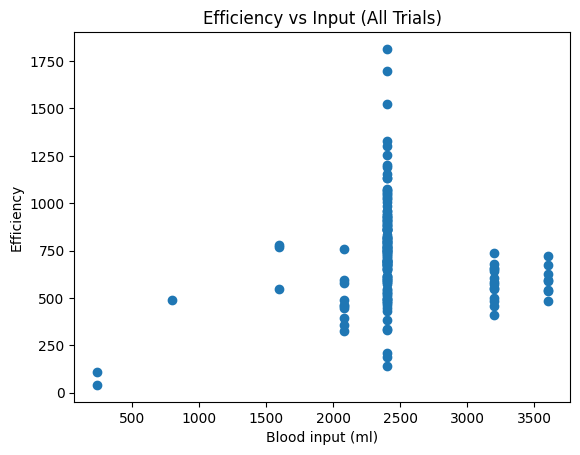

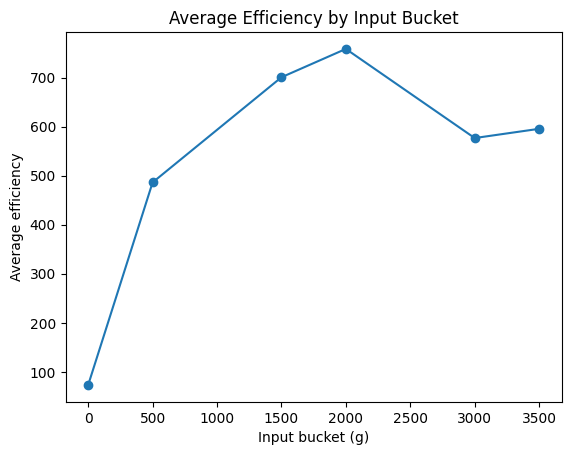

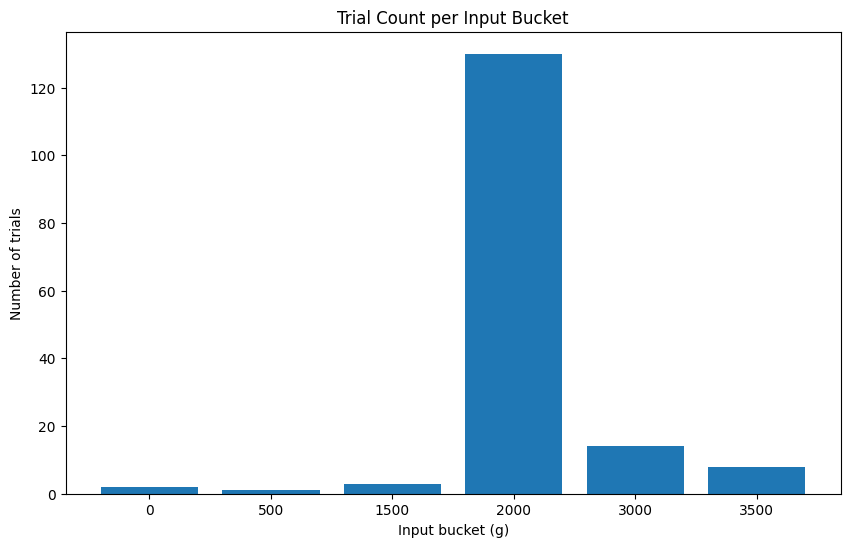

(6, 3)


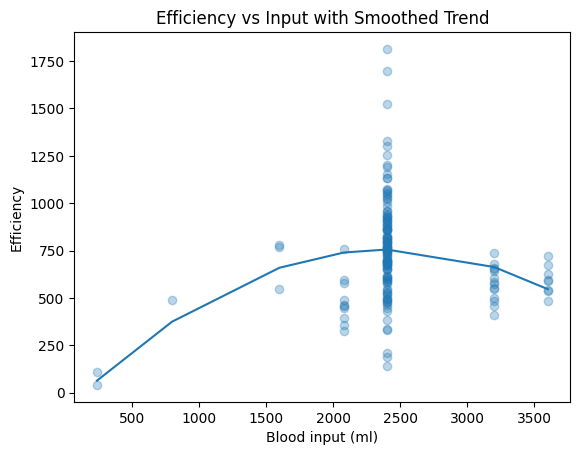

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/bf_efficiency_clean.csv")
df.head()

df.describe()

import matplotlib.pyplot as plt

plt.hist(df["efficiency"], bins=20)
plt.xlabel("Eggs per ml of blood")
plt.ylabel("Number of trials")
plt.title("Distribution of Egg Production Efficiency")
plt.show()

plt.scatter(df["blood_input_ml"], df["egg_output_total"])
plt.xlabel("Blood Input (ml)")
plt.ylabel("Egg Output")
plt.title("Blood Input vs Egg Output")
plt.show()

df.groupby("line_id")["efficiency"].mean().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["blood_input_ml"], df["efficiency"])
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Input (All Trials)")
plt.show()

import os
os.makedirs("../reports/figures", exist_ok=True)


bucket_df = (
    df.assign(input_bucket=(df["blood_input_ml"] // 500) * 500)
      .groupby("input_bucket")
      .agg(
          avg_efficiency=("efficiency", "mean"),
          n_trials=("efficiency", "count")
      )
      .reset_index()
)

plt.figure()
plt.plot(bucket_df["input_bucket"], bucket_df["avg_efficiency"], marker="o")
plt.xlabel("Input bucket (g)")
plt.ylabel("Average efficiency")
plt.title("Average Efficiency by Input Bucket")
plt.savefig("../reports/figures/efficiency_by_bucket.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(
    bucket_df["input_bucket"].astype(str),
    bucket_df["n_trials"]
)
plt.xlabel("Input bucket (g)")
plt.ylabel("Number of trials")
plt.title("Trial Count per Input Bucket")
plt.show()

print(bucket_df.shape)
bucket_df.head()
bucket_df.dtypes

import numpy as np
os.makedirs("../reports/figures", exist_ok=True)

x = df["blood_input_ml"]
y = df["efficiency"]

z = np.polyfit(x, y, 2)
p = np.poly1d(z)

x_sorted = np.sort(x)
plt.figure()
plt.scatter(x, y, alpha=0.3)
plt.plot(x_sorted, p(x_sorted))
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Input with Smoothed Trend")
plt.savefig("../reports/figures/efficiency_vs_input_smooth_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
DATA_PATH = "../data/processed/bf_efficiency_clean.csv"
FIGURES_PATH = "../reports/figures"

os.makedirs(FIGURES_PATH, exist_ok=True)

df = pd.read_csv(DATA_PATH)

assert not df.empty, "Cleaned dataset is empty"


In [4]:
df.shape


(158, 25)

In [5]:
df.head()


,line_id,trial_id,colony_strength,BF1,BF2,BF3,BF4,bf1_amounts_ml,bf2_amounts_ml,bf3_amounts_ml,...,collection_1_output,collection_2_output,collection_3_output,collection_4_output,time_between_bf_hrs,blood_input_ml,egg_output_total,location,efficiency,eggs_per_hour
0,LAO BRO 20.2.1,20.2.1,"80,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,230500,415000,202000,218000,48,2400,1065500,22C,443.958333,22197.916667
1,LAO BRO 20.2.2,20.2.2,"80,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,273000,302000,187000,393000,48,2400,1155000,22C,481.250000,24062.500000
2,LAO BRO 20.2.3,20.2.3,"120,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,680000,520000,367000,350000,48,2400,1917000,22A,798.750000,39937.500000
3,LAO BRO 20.2.4,20.2.4,"120,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,238000,390000,295000,213000,48,2400,1136000,18B,473.333333,23666.666667
4,LAO BRO 20.2.5,20.2.5,"120,000",01-09-2025\n02-09-2025,04-09-2025\n05-09-2025,08-09-2025\n09-09-2025,11-09-2025\n12-09-2025,600,600,600,...,610000,550000,390000,200000,48,2400,1750000,18B,729.166667,36458.333333


In [6]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])


,bf1_amounts_ml,bf2_amounts_ml,bf3_amounts_ml,bf4_amounts_ml,collection_1_output,collection_2_output,collection_3_output,collection_4_output,time_between_bf_hrs,blood_input_ml,egg_output_total,efficiency,eggs_per_hour
count,158.000000,158.000000,158.000000,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,158.000000,158.0,158.000000,1.580000e+02,158.000000,158.000000
mean,614.683544,614.683544,614.683544,614.683544,5.199430e+05,5.212658e+05,3.867563e+05,355877.848101,48.0,2458.734177,1.783843e+06,722.576984,37163.396624
std,117.650410,117.650410,117.650410,117.650410,2.390743e+05,2.116372e+05,1.808946e+05,153532.430493,0.0,470.601640,6.607466e+05,265.536800,13765.554613
min,60.000000,60.000000,60.000000,60.000000,2.000000e+03,2.500000e+03,2.500000e+03,2700.000000,48.0,240.000000,9.700000e+03,40.416667,202.083333
5%,520.000000,520.000000,520.000000,520.000000,1.596500e+05,1.609000e+05,1.479500e+05,137700.000000,48.0,2080.000000,7.820500e+05,351.927885,16292.708333
25%,600.000000,600.000000,600.000000,600.000000,3.760000e+05,3.885000e+05,2.750000e+05,250000.000000,48.0,2400.000000,1.410250e+06,550.312500,29380.208333
50%,600.000000,600.000000,600.000000,600.000000,4.975000e+05,5.300000e+05,3.735000e+05,335000.000000,48.0,2400.000000,1.793500e+06,696.250000,37364.583333
75%,600.000000,600.000000,600.000000,600.000000,6.262500e+05,6.350000e+05,4.587500e+05,454250.000000,48.0,2400.000000,2.128000e+06,860.416667,44333.333333
95%,815.000000,815.000000,815.000000,815.000000,9.807500e+05,8.565000e+05,7.047500e+05,630000.000000,48.0,3260.000000,2.783500e+06,1159.791667,57989.583333
max,900.000000,900.000000,900.000000,900.000000,1.340000e+06,1.240000e+06,1.065000e+06,775000.000000,48.0,3600.000000,4.355000e+06,1814.583333,90729.166667


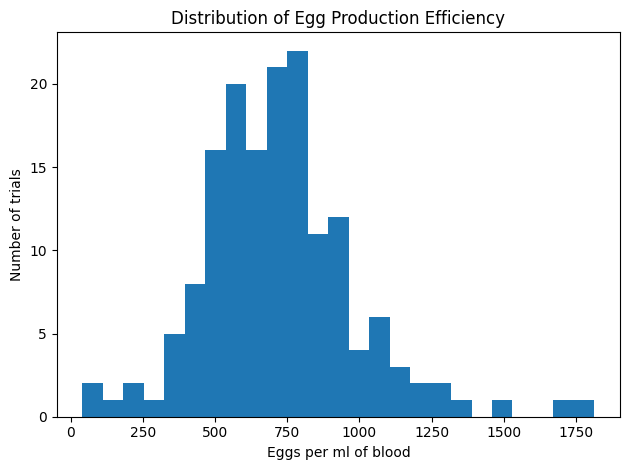

In [7]:
plt.figure()
plt.hist(
    df["efficiency"].dropna(),
    bins=25
)
plt.xlabel("Eggs per ml of blood")
plt.ylabel("Number of trials")
plt.title("Distribution of Egg Production Efficiency")
plt.tight_layout()
plt.show()


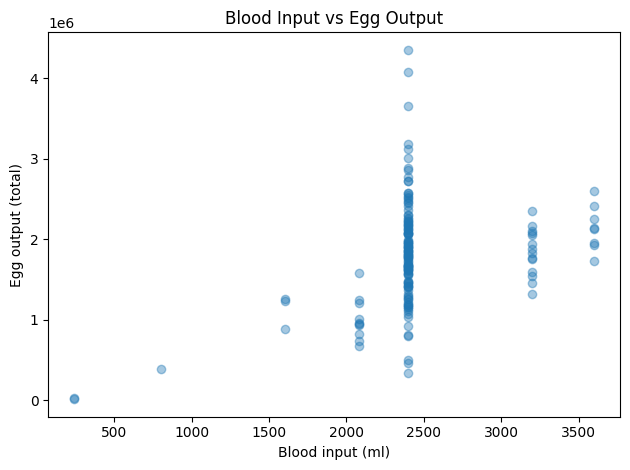

In [8]:
plt.figure()
plt.scatter(
    df["blood_input_ml"],
    df["egg_output_total"],
    alpha=0.4
)
plt.xlabel("Blood input (ml)")
plt.ylabel("Egg output (total)")
plt.title("Blood Input vs Egg Output")
plt.tight_layout()
plt.show()


In [9]:
line_efficiency = (
    df.groupby("line_id", dropna=True)
      .agg(
          avg_efficiency=("efficiency", "mean"),
          n_trials=("efficiency", "count")
      )
      .sort_values("avg_efficiency", ascending=False)
)

line_efficiency


,avg_efficiency,n_trials
line_id,,
TML BRO 16.6.1,1814.583333,1
TML BRO 16.6.2,1697.916667,1
TML BRO 16.6.3,1525.000000,1
TML BRO 16.4.6,1327.083333,1
TML BRO 16.4.5,1300.000000,1
...,...,...
TML AMP 15.3.1,207.916667,1
TML AMP 15.2.2,190.000000,1
TML AMP 15.2.1,137.708333,1


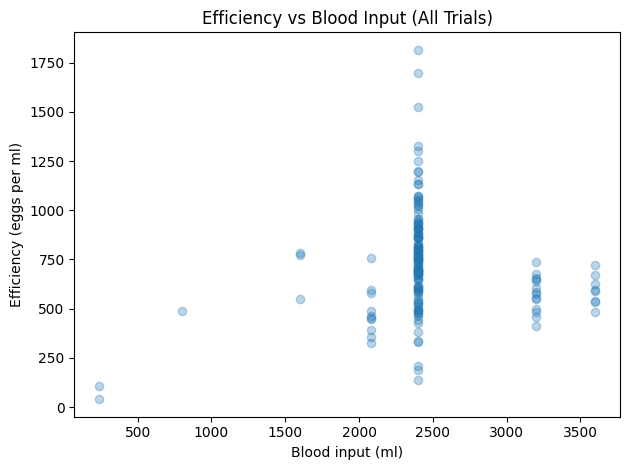

In [10]:
plt.figure()
plt.scatter(
    df["blood_input_ml"],
    df["efficiency"],
    alpha=0.3
)
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency vs Blood Input (All Trials)")
plt.tight_layout()
plt.show()


In [11]:
bucket_size = 500  # ml

bucket_df = (
    df
    .dropna(subset=["blood_input_ml", "efficiency"])
    .assign(
        input_bucket=lambda x: (x["blood_input_ml"] // bucket_size) * bucket_size
    )
    .groupby("input_bucket")
    .agg(
        avg_efficiency=("efficiency", "mean"),
        n_trials=("efficiency", "count")
    )
    .reset_index()
    .sort_values("input_bucket")
)

bucket_df


,input_bucket,avg_efficiency,n_trials
0,0,73.333333,2
1,500,486.250000,1
2,1500,700.625000,3
3,2000,758.418886,130
4,3000,576.696429,14
5,3500,595.520833,8


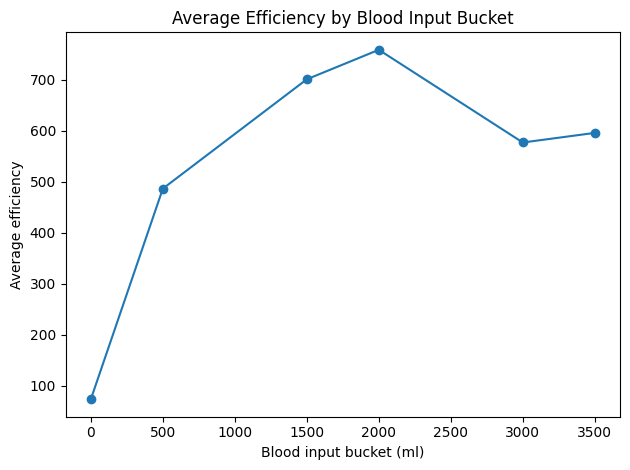

In [12]:
plt.figure()
plt.plot(
    bucket_df["input_bucket"],
    bucket_df["avg_efficiency"],
    marker="o"
)
plt.xlabel("Blood input bucket (ml)")
plt.ylabel("Average efficiency")
plt.title("Average Efficiency by Blood Input Bucket")
plt.tight_layout()
plt.savefig(
    f"{FIGURES_PATH}/avg_efficiency_by_input_bucket.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


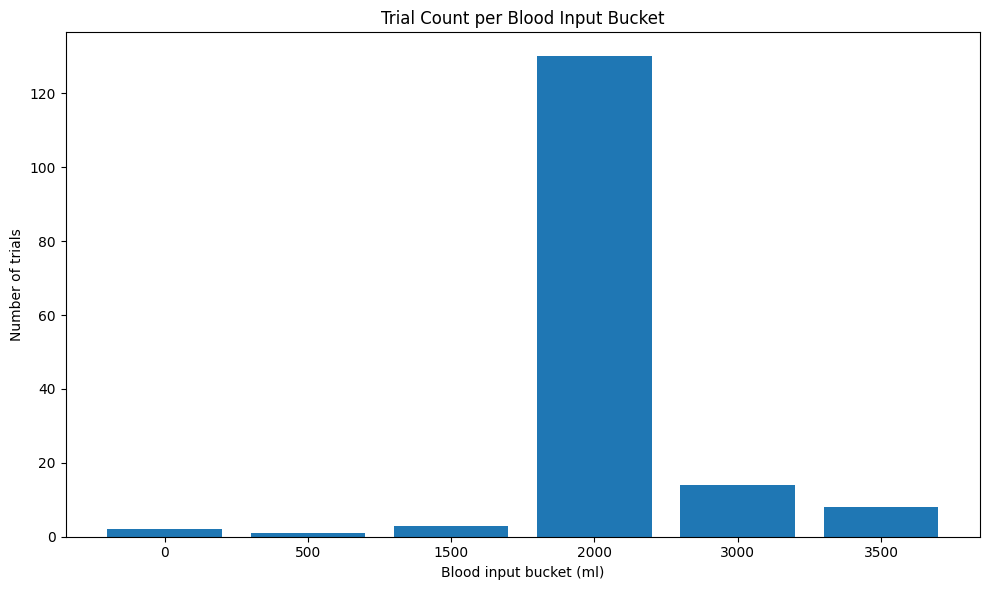

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(
    bucket_df["input_bucket"].astype(str),
    bucket_df["n_trials"]
)
plt.xlabel("Blood input bucket (ml)")
plt.ylabel("Number of trials")
plt.title("Trial Count per Blood Input Bucket")
plt.tight_layout()
plt.show()


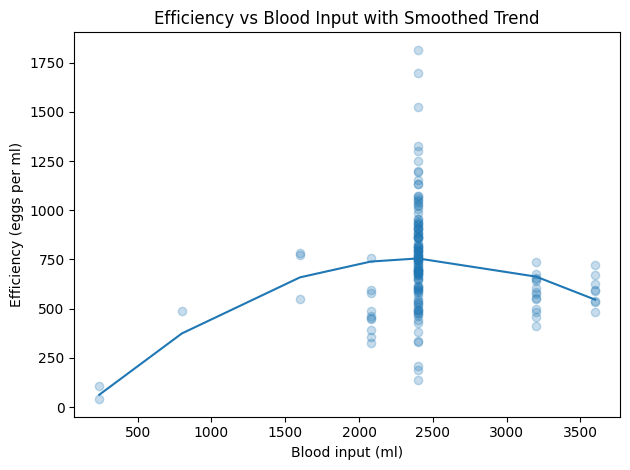

In [14]:
x = df["blood_input_ml"]
y = df["efficiency"]

mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

z = np.polyfit(x, y, deg=2)
p = np.poly1d(z)

x_sorted = np.sort(x)

plt.figure()
plt.scatter(x, y, alpha=0.25)
plt.plot(x_sorted, p(x_sorted))
plt.xlabel("Blood input (ml)")
plt.ylabel("Efficiency (eggs per ml)")
plt.title("Efficiency vs Blood Input with Smoothed Trend")
plt.tight_layout()
plt.savefig(
    f"{FIGURES_PATH}/efficiency_vs_input_smoothed_trend.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
